In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [6]:
config_file = 'files/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'files/frozen_inference_graph.pb'

In [7]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [32]:
classLabels = [] ## empty list of python
#file_name = 'files/Labels.txt'
file_name = 'files/coco-labels-2014_2017.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [33]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [11]:
model.setInputSize(320, 320)
#model.setInputSize(1280, 1280)
model.setInputScale(1.0 / 127.5) # 255/2 = 127.5
model.setInputMean((127.5, 127.5,127.5)) # mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001E6F2F1A7B0>

# read image 

In [25]:
img = cv2.imread('../sample/jpg/sample4.jpg')

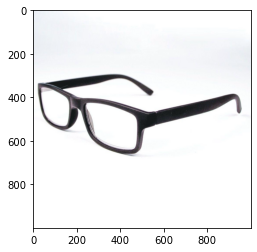

In [26]:
plt.imshow(img) # bgr : 기본적으로 opencv를 시행하면 나오는 모습

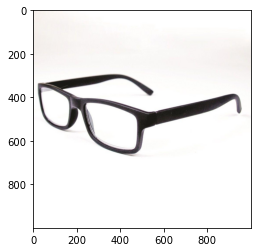

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # bgr을 rgb로

In [28]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5) #정확도

In [29]:
print(ClassIndex) # classlabel 첫번째가 person이고, 사진 내에 사람들만 있으므로, 감지 한 숫자만큼 나옴

[[87]]


In [30]:
# 우리가 아는 인덱스 번호와 맞추기 위한 작업
font_scale = 3 # font size
font = cv2.FONT_HERSHEY_PLAIN # font type
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color = (0, 0, 0), thickness = 1)
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

IndexError: list index out of range

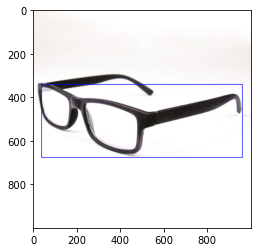

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo 

In [18]:
cap = cv2.VideoCapture("image/vlog_Trim.mp4")
#cap =  = cv2.VideoCapture(1)

# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    #raise IOError("Cannot open webcam")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confodence, bbox = model.detect(frame, confThreshold = 0.5)
    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)
    
    cv2.imshow('Object Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

()
()
[[37]]
[[37]]
[[37]]
[[37]]
[[37]]
[[79]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
[[77]]
()
()
()
()
()
()
()
()
[[1]]
[[1]]
()
()
()
[[74]]
()
()
()
()
[[37]
 [77]]
()
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
()
()
()
[[3]]
[[3]]
[[3]]
[[3]]
()
[[3]]
[[3]]
[[3]
 [1]
 [3]]
[[3]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [1]]
[[1]
 [3]]
[[3]]
[[3]]
[[3]
 [1]
 [1]]
[[3]
 [1]]
[[3]]
[[3]
 [1]]
[[3]]
[[3]
 [1]]
[[3]
 [3]]
[[3]
 [1]]
[[3]
 [3]
 [3]
 [1]]
[[3]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [1]]
[[ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]]
[[3]
 [1]
 [3]]
[[3]
 [3]
 [1]]
[[3]
 [3]
 [1]]
[[1]
 [3]
 [1]]
[[1]
 [3]]
[[1]
 [1]
 [3]]
[[1]
 [

[[82]]
()
[[1]]
[[1]
 [1]]
()
[[1]]
[[72]]
()
()
()
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [84]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [82]
 [ 1]]
[[ 1]
 [ 1]
 [82]
 [ 1]]
[[ 1]
 [82]
 [ 1]]
[[82]
 [ 1]
 [ 1]]
[[82]
 [ 1]
 [ 1]
 [ 1]]
[[82]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [82]]
[[82]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [82]
 [ 1]
 [ 1]]
[[82]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [82]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [82]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [82]
 [ 1]]
[[ 1]
 [ 1]
 [82]]
[[ 1]
 [ 1]
 [ 1]
 [82]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
()
[[1]
 [1]]
[[1]
 [1]]
[[82]]
[[82]]
()
[[1]]
[[72]]
[[ 1]
 [ 1]
 [72]]
[[ 1]
 [ 1]
 [72]]
[[ 1]
 [ 1]
 [ 1]
 [72]
 [ 1]]
[[72]
 [ 1]]
[[ 1]
 [72]
 [ 1]
 [ 1]
 [72]]
[[72]
 [72]
 [ 1]
 [ 1]]
[[72]
 [ 1]]
[[72]
 [ 1]
 [ 1]]
[[72]
 [ 1]
 [ 1]
 [ 